Missing Values:
 Student    0
Maths      0
Science    0
English    0
SST        0
dtype: int64

All marks are between 0 and 100 True
Subject-wise Statistics
Mean:
 Maths      67.0
Science    70.0
English    69.0
SST        69.0
dtype: float64
Median:
 Maths      66.0
Science    68.5
English    67.0
SST        67.0
dtype: float64
Mode:
 Maths      45.0
Science    48.0
English    67.0
SST        47.0
Name: 0, dtype: float64
Standard Deviation:
 Maths      16.706619
Science    15.448840
English    13.976170
SST        15.092309
dtype: float64
Variance:
 Maths      279.111111
Science    238.666667
English    195.333333
SST        227.777778
dtype: float64
Student-wise Performance
  Student  Total  Average           Category
0    Amit    304    76.00               Good
1    Riya    241    60.25            Average
2   Sohan    363    90.75          Excellent
3    Neha    196    49.00  Needs Improvement
4   Rahul    276    69.00            Average
5  Anjali    243    60.75            Average


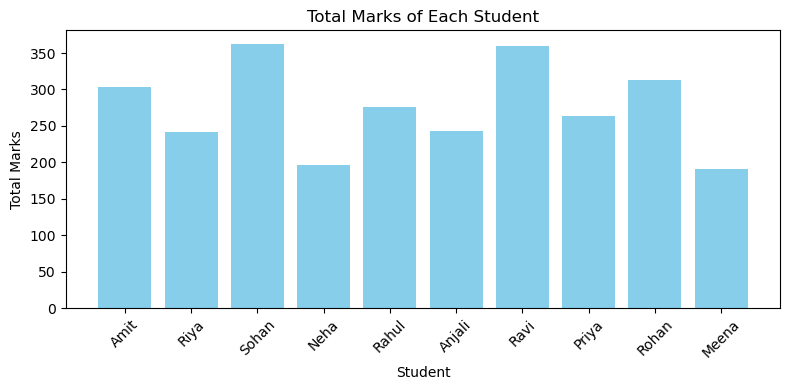

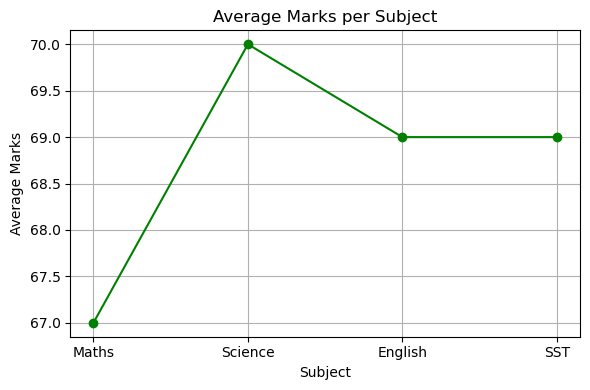

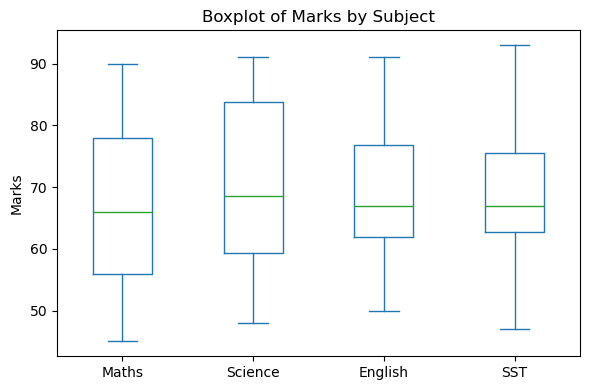

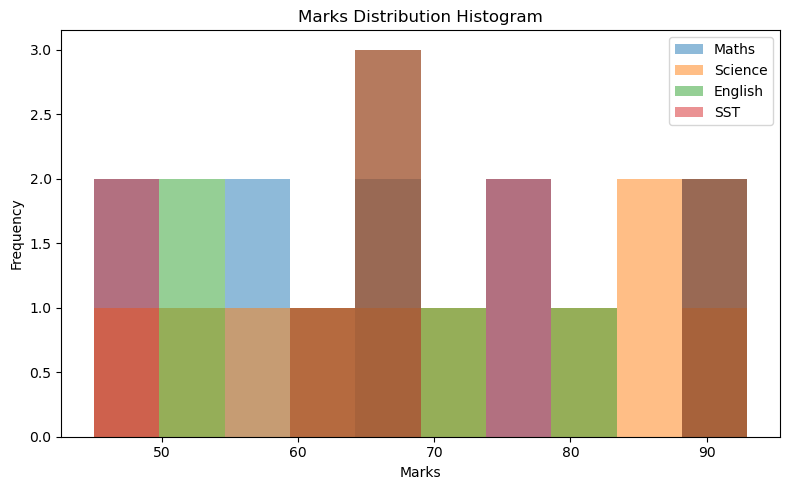

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
# Step 1: Create Dataset
data = {'Student': ['Amit', 'Riya', 'Sohan', 'Neha', 'Rahul', 'Anjali', 'Ravi', 'Priya', 'Rohan', 'Meena'],
'Maths': [78, 56, 90, 45, 66, 56, 90, 66, 78, 45],
'Science': [85, 59, 91, 52, 72, 60, 88, 65, 80, 48],
'English': [67, 61, 89, 50, 70, 65, 91, 67, 79, 51],
'SST': [74, 65, 93, 49, 68, 62, 90, 66, 76, 47]}
df = pd.DataFrame(data)
# Step 2: Check for Missing or Invalid Data
print("Missing Values:\n", df.isnull().sum())
print("\nAll marks are between 0 and 100", ((df.drop("Student", axis=1) >= 0) & (df.drop("Student", axis=1) <= 100)).all().all())
# Step 3: Descriptive Statistics
print("Subject-wise Statistics")
print("Mean:\n", df.mean(numeric_only=True))
print("Median:\n", df.median(numeric_only=True))
print("Mode:\n", df.mode(numeric_only=True).iloc[0])
print("Standard Deviation:\n", df.std(numeric_only=True))
print("Variance:\n", df.var(numeric_only=True))
# Step 4: Student-wise Total and Average
df['Total'] = df[['Maths', 'Science', 'English', 'SST']].sum(axis=1)
df['Average'] = df['Total'] / 4
# Add Performance Category
def get_category(avg):
    if avg >= 85:
        return "Excellent"
    elif avg >= 70:
        return "Good"
    elif avg >= 50:
        return "Average"
    else:
        return "Needs Improvement"
df['Category'] = df['Average'].apply(get_category)
print("Student-wise Performance")
print(df[['Student', 'Total', 'Average', 'Category']])
# Step 5: Subject-wise Toppers
print("Subject-wise Toppers")
subjects = ['Maths', 'Science', 'English', 'SST']
for subject in subjects:
    topper = df[df[subject] == df[subject].max()]
    print(f"{subject} Topper: {topper.iloc[0]['Student']} - {topper.iloc[0][subject]} marks")
# Step 6: Visualization
# Bar Chart: Total Marks per Student
plt.figure(figsize=(8, 4))
plt.bar(df['Student'], df['Total'], color='skyblue')
plt.title("Total Marks of Each Student")
plt.xlabel("Student")
plt.ylabel("Total Marks")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# Line Chart: Subject-wise Average
subject_means = df[subjects].mean()
plt.figure(figsize=(6, 4))
plt.plot(subject_means.index, subject_means.values, marker='o', color='green')
plt.title("Average Marks per Subject")
plt.xlabel("Subject")
plt.ylabel("Average Marks")
plt.grid(True)
plt.tight_layout()
plt.show()
# Boxplot
df[subjects].plot(kind='box', title='Boxplot of Marks by Subject', figsize=(6, 4))
plt.ylabel("Marks")
plt.tight_layout()
plt.show()
# Histogram for each subject
df[subjects].plot(kind='hist', alpha=0.5, bins=10, title='Marks Distribution Histogram', figsize=(8, 5))
plt.xlabel("Marks")
plt.tight_layout()
plt.show()